In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [8]:
data_dir = r"C:\Detect\object"
img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Required for confusion matrix
)

Found 221 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


In [9]:
# 2. Build CNN model
# =====================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,587 (2.61 MB)

 Trainable params: 683,587 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 3. Train CNN
# =====================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 399ms/step - accuracy: 0.4035 - loss: 1.1717 - val_accuracy: 0.6296 - val_loss: 0.9928
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.5912 - loss: 0.9057 - val_accuracy: 0.8519 - val_loss: 0.6517
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.7805 - loss: 0.6210 - val_accuracy: 0.7778 - val_loss: 0.3870
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.8849 - loss: 0.3877 - val_accuracy: 0.9259 - val_loss: 0.2487
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.8654 - loss: 0.3992 - val_accuracy: 0.9074 - val_loss: 0.3011
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.8822 - loss: 0.3478 - val_accuracy: 0.9074 - val_loss: 0.2116
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.9417 - loss: 0.2245 - val_accuracy: 0.9259 - val_loss: 0.2094
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.9248 - loss: 0.2002 - val_accuracy: 0.9259 - val_loss:

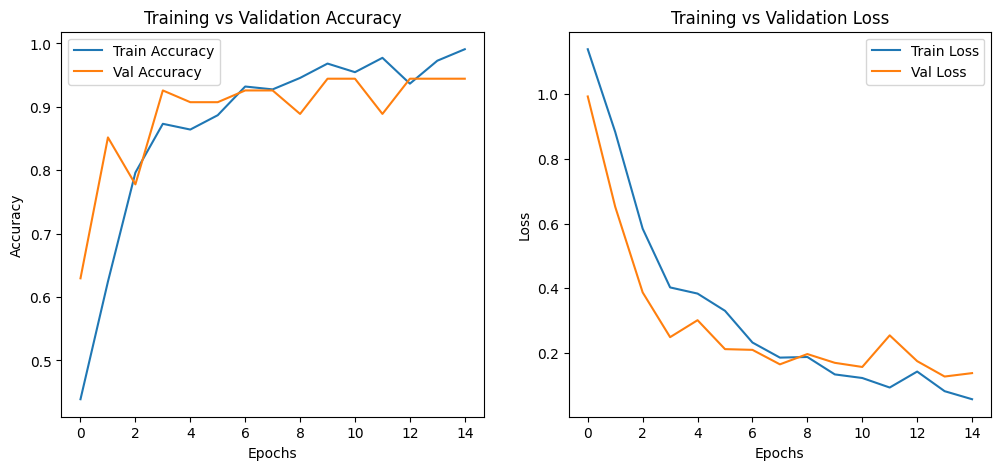

In [11]:
# 4. Plot Training & Validation Accuracy/Loss
# =====================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [12]:
# =====================
# 5. Accuracy Score & Confusion Matrix
# =====================
# Predict on validation data
val_pred = model.predict(val_gen)
y_pred = np.argmax(val_pred, axis=1)
y_true = val_gen.classes

# Accuracy
acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy:", acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Validation Accuracy: 0.9444444444444444


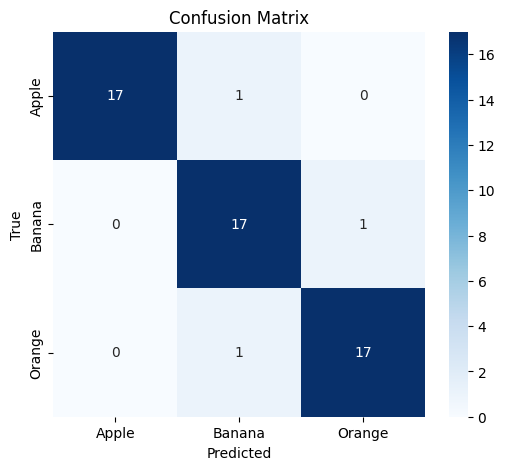

In [13]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_labels = list(val_gen.class_indices.keys())

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      0.94      0.97        18
      Banana       0.89      0.94      0.92        18
      Orange       0.94      0.94      0.94        18

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



In [15]:
model.save("fruit_cnn_model.h5")
print("Model saved as fruit_cnn_model.h5")

Model saved as fruit_cnn_model.h5
